In [33]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.quantum_info import Statevector, Operator
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


## Toffoli gate

In [ ]:
def drawToffoli():
    # Create a quantum circuit with 3 qubit
    A = QuantumRegister(1, "A")
    B = QuantumRegister(1, "B")
    C = QuantumRegister(1, "C")
    qc = QuantumCircuit(A,B,C)

    # Apply the Toffoli gate
    qc.ccx(0, 1, 2)

    # Visualize the quantum circuit
    print(qc)

    display(qc.draw(output="mpl", reverse_bits=False, style="plain"))
    display(Operator(qc).draw('latex'))
    
    # Create a quantum circuit with 3 qubit

drawToffoli()

A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
C = QuantumRegister(1, "C")
qc = QuantumCircuit(A,B,C)

# Apply the Toffoli gate
qc.ccx(0, 1, 2)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)





NAND Gate Simulation:
Input State: |111>
Applying NAND(A, B)...
Output State:
|110>

Truth Table:
 A  B  C  A'  B'  C'
 0  0  1   1   1   0
 0  1  1   1   0   0
 1  0  1   0   1   0
 1  1  1   0   0   1

Circuit Diagram:


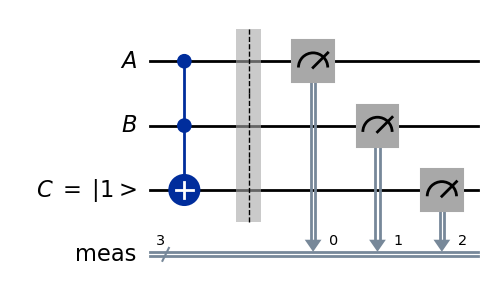

NameError: name 'FigureCanvasTkAgg' is not defined

In [34]:
def NAND(a, b, draw=True):
    print("NAND Gate Simulation:")
    print(f"Input State: |{a}{b}1>")
    print("Applying NAND(A, B)...")

    A = QuantumRegister(1, f"A")
    B = QuantumRegister(1, f"B")
    C = QuantumRegister(1, "C = |1>")
    qc = QuantumCircuit(A, B, C)

    if a:
        qc.x(0)
    if b:
        qc.x(1)
        
    qc.x(2)
    qc.ccx(0, 1, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    output = list(counts.keys())[0]
    
    print("Output State:")
    print(f"|{output[::-1]}>")  # Reverse the order to match the standard convention

    truth_table_data = {
        "A": [0, 0, 1, 1],
        "B": [0, 1, 0, 1],
        "C": [1, 1, 1, 1],
        "A'": [1, 1, 0, 0],
        "B'": [1, 0, 1, 0],
        "C'": [0, 0, 0, 1],
    }

    truth_table = pd.DataFrame(truth_table_data)
    
    print("\nTruth Table:")
    print(truth_table.to_string(index=False))
    
    if draw:
        print("\nCircuit Diagram:")
        qc_draw = QuantumCircuit(A, B, C)
        qc_draw.ccx(0, 1, 2)
        qc_draw.measure_all()
        qc_draw.draw(output="mpl", style="iqp", reverse_bits=False)
        # Use the following line if you want to display the circuit
        display(qc_draw.draw(output="mpl", style="iqp", reverse_bits=False))

    return qc

qc= NAND(1, 1)
# Simulate the quantum circuit
# simulator = Aer.get_backend('statevector_simulator')
# transpiled_qc = transpile(qc, simulator)
# # Simulate the transpiled quantum circuit
# result = simulator.run(assemble(transpiled_qc)) 
# # Display the Bloch vector of the resulting state
# statevector = result.result().get_statevector()
# plot_bloch_multivector(statevector)

fig = plt.Figure(figsize=(10, 20))

# Embed the matplotlib figure in the Tkinter GUI
canvas = FigureCanvasTkAgg(fig, master=self)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(row=19, column=0, columnspan=2, pady=10, sticky="w")  # Use grid for consistency

# Add a toolbar to the canvas
toolbar = NavigationToolbar2Tk(canvas, self)
toolbar.update()
toolbar.grid(row=20, column=0, columnspan=2, pady=10, sticky="w")  # Use grid for consistency
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc))
# Get the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector, fig=fig)


In [ ]:
def Not(c, draw=True):
    print("Not Gate Simulation:")
    print(f"Input State:|11{c}>")
    print("Applying Not(C)...")

    A = QuantumRegister(1, f"A =|1>")
    B = QuantumRegister(1, "B = |1>")
    C = QuantumRegister(1, " C ")
    qc = QuantumCircuit(A, B, C)
    qc.x(0)
    qc.x(1)

    if c:
        qc.x(2)
    
    qc.ccx(0, 1, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    output = list(counts.keys())[0]
    
    print("Output State:")
    print(f"|{output[::-1]}>")  # Reverse the order to match the standard convention

    def truth_table():
        return pd.DataFrame(
            {
                "A": [1, 1],
                "B": [1, 1],
                "C": [0, 1],
                "A'": [1, 1],
                "B'": [1, 1],
                "C'": [1, 0]
            }
        )

    
    print("\nTruth Table:")
    print(truth_table().to_string(index=False))
    
    if draw:
        print("\nCircuit Diagram:")
        qc_draw = QuantumCircuit(A, B, C)
        qc_draw.ccx(0, 1, 2)
        qc_draw.measure_all()
        qc_draw.draw(output="mpl", style="iqp", reverse_bits=False)
        # Use the following line if you want to display the circuit
        display(qc_draw.draw(output="mpl", style="iqp", reverse_bits=False))

    return qc

qc= Not(0)
# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)


NAND Gate Simulation:
Input State: |110>
Applying AND(A, B)...
Output State:
|111>

Truth Table:
 A  B  C  A'  B'  C'
 0  0  0   0   0   0
 0  1  0   0   1   0
 1  0  0   1   0   0
 1  1  0   1   1   1

Circuit Diagram:


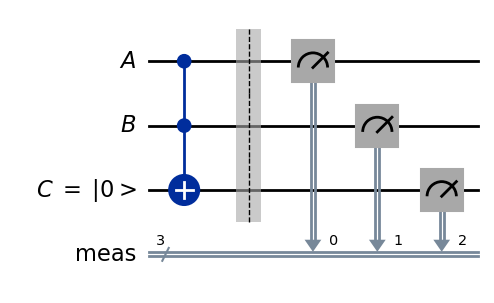

C:\Users\hebas\AppData\Local\Temp\ipykernel_20908\371538537.py:57: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_qc))


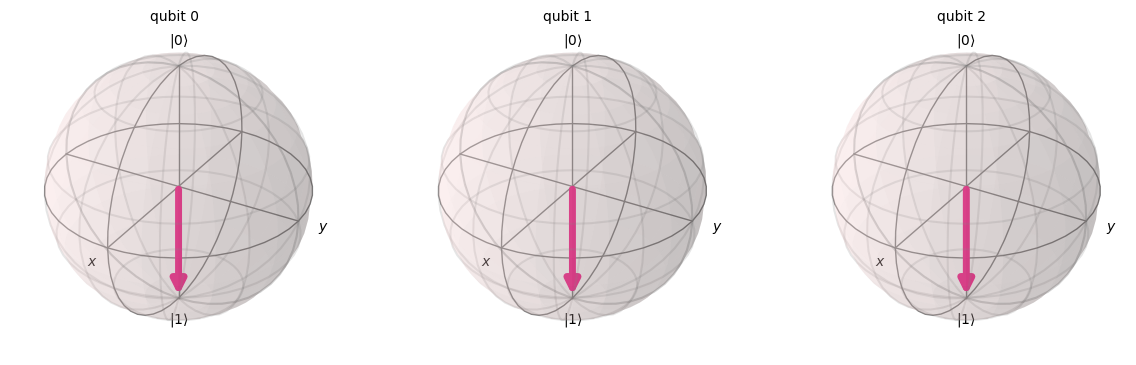

In [15]:
def AND(a, b, draw=True):
    print("NAND Gate Simulation:")
    print(f"Input State: |{a}{b}0>")
    print("Applying AND(A, B)...")

    A = QuantumRegister(1, f"A")
    B = QuantumRegister(1, f"B")
    C = QuantumRegister(1, "C = |0>")
    qc = QuantumCircuit(A, B, C)

    if a:
        qc.x(0)
    if b:
        qc.x(1)

    qc.ccx(0, 1, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    output = list(counts.keys())[0]
    
    print("Output State:")
    print(f"|{output[::-1]}>")  # Reverse the order to match the standard convention

    truth_table_data = {
        "A": [0, 0, 1, 1],
        "B": [0, 1, 0, 1],
        "C": [0, 0, 0, 0],
        "A'": [0, 0, 1, 1],
        "B'": [0, 1, 0, 1],
        "C'": [0, 0, 0, 1],
     }

    truth_table = pd.DataFrame(truth_table_data)
    
    print("\nTruth Table:")
    print(truth_table.to_string(index=False))
    
    if draw:
        print("\nCircuit Diagram:")
        qc_draw = QuantumCircuit(A, B, C)
        qc_draw.ccx(0, 1, 2)
        qc_draw.measure_all()
        qc_draw.draw(output="mpl", style="iqp", reverse_bits=False)
        # Use the following line if you want to display the circuit
        display(qc_draw.draw(output="mpl", style="iqp", reverse_bits=False))

    return qc

qc=AND(1, 1)
# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)


CNOT Gate Simulation:
Input State: |110>
Applying AND(A, C)...
Output State:
|111>

Truth Table:
 A  B  C  A'  B'  C'
 0  1  0   0   1   0
 0  1  1   0   1   1
 1  1  0   1   1   1
 1  1  1   1   1   0

Circuit Diagram:


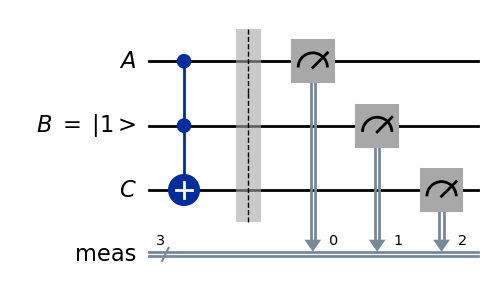

C:\Users\hebas\AppData\Local\Temp\ipykernel_20908\2639867406.py:61: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_qc))


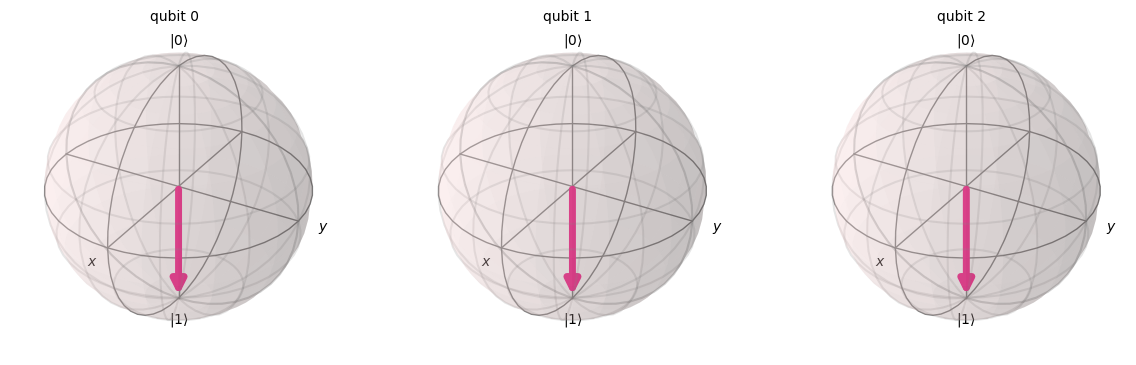

In [16]:
def CNOT(a, c, draw=True):
    print("CNOT Gate Simulation:")
    print(f"Input State: |{a}1{c}>")
    print("Applying AND(A, C)...")

    A = QuantumRegister(1, f"A")
    B = QuantumRegister(1, "B = |1>")
    C = QuantumRegister(1, f"C ")
    qc = QuantumCircuit(A, B, C)

    qc.x(1)

    if a:
        qc.x(0)
    if c:
        qc.x(2)

    qc.ccx(0, 1, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    output = list(counts.keys())[0]
    
    print("Output State:")
    print(f"|{output[::-1]}>")  # Reverse the order to match the standard convention

    truth_table_data = {
        "A": [0, 0, 1, 1],
        "B": [1, 1, 1, 1],
        "C": [0, 1, 0, 1],
        "A'": [0, 0, 1, 1],
        "B'": [1, 1, 1, 1],
        "C'": [0, 1, 1, 0],
     }

    truth_table = pd.DataFrame(truth_table_data)
    
    print("\nTruth Table:")
    print(truth_table.to_string(index=False))
    
    if draw:
        print("\nCircuit Diagram:")
        qc_draw = QuantumCircuit(A, B, C)
        qc_draw.ccx(0, 1, 2)
        qc_draw.measure_all()
        qc_draw.draw(output="mpl", style="iqp", reverse_bits=False)
        # Use the following line if you want to display the circuit
        display(qc_draw.draw(output="mpl", style="iqp", reverse_bits=False))

    # return
    return qc

qc= CNOT(1, 0)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)


FANOUT Gate Simulation:
Input State: |001>
Applying AND(A, C)...
Output State:
|001>

Truth Table:
 A  B  C  A'  B'  C'
 0  0  0   0   0   0
 0  0  1   0   0   1

Circuit Diagram:


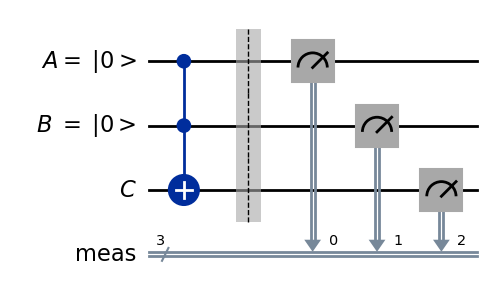

C:\Users\hebas\AppData\Local\Temp\ipykernel_20908\481117350.py:57: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_qc))


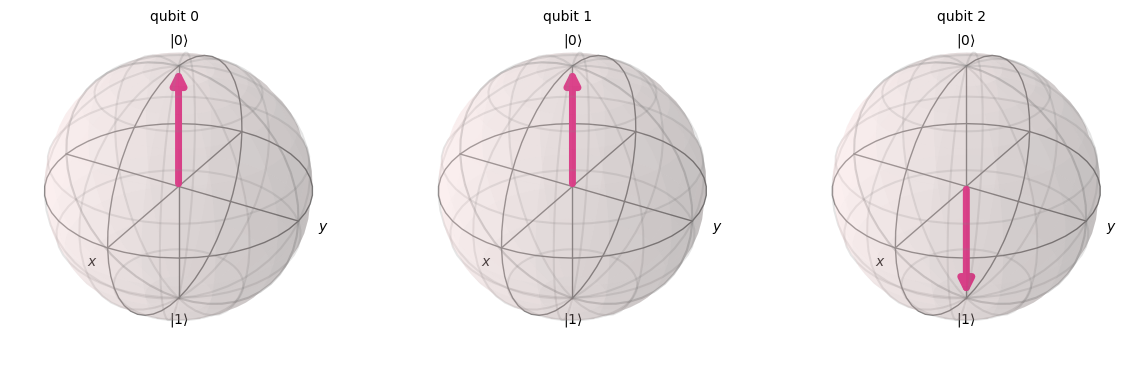

In [30]:
def FANOUT(c, draw=True):
    print("FANOUT Gate Simulation:")
    print(f"Input State: |00{c}>")
    print("Applying AND(A, C)...")

    A = QuantumRegister(1, "A= |0>")
    B = QuantumRegister(1, "B = |0>")
    C = QuantumRegister(1, f"C ")
    qc = QuantumCircuit(A, B, C)

    if c:
        qc.x(2)

    qc.ccx(0, 1, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    output = list(counts.keys())[0]
    
    print("Output State:")
    print(f"|{output[::-1]}>")  # Reverse the order to match the standard convention

    truth_table_data = {
        "A": [0, 0],
        "B": [0, 0],
        "C": [0, 1],
        "A'": [0, 0],
        "B'": [0, 0],
        "C'": [0, 1],
     }

    truth_table = pd.DataFrame(truth_table_data)
    
    print("\nTruth Table:")
    print(truth_table.to_string(index=False))
    
    if draw:
        print("\nCircuit Diagram:")
        qc_draw = QuantumCircuit(A, B, C)
        qc_draw.ccx(0, 1, 2)
        qc_draw.measure_all()
        qc_draw.draw(output="mpl", style="iqp", reverse_bits=False)
        # Use the following line if you want to display the circuit
        display(qc_draw.draw(output="mpl", style="iqp", reverse_bits=False))

    # return
    return qc

qc= FANOUT(1)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)


OR Gate Simulation:
Input State:|11111>
Applying OR(A,B) ...
 Output |10101>
|A NOT(A) OR(A,B) NOT(B) B>

Truth Table:
 A  B  C  D  E  A'  NOT(A)  OR(A,B)  NOT(B)  B'
 0  0  1  1  1   0       1        0       1   0
 0  1  1  1  1   0       1        1       0   1
 1  0  1  1  1   1       0        1       1   0
 1  1  1  1  1   1       0        1       0   1


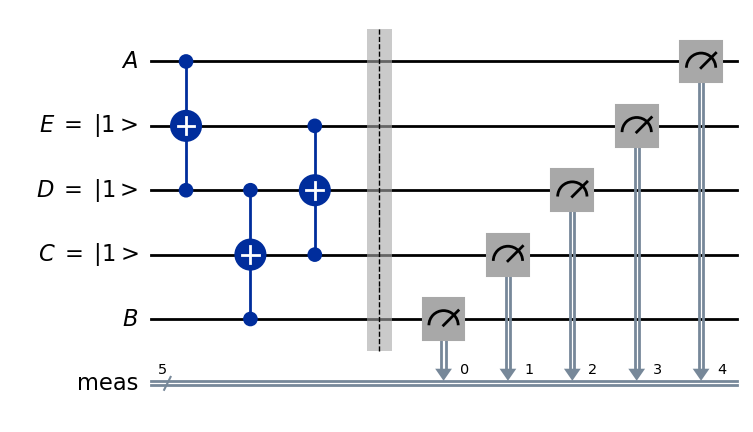

C:\Users\hebas\AppData\Local\Temp\ipykernel_20908\3023898415.py:65: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_qc))


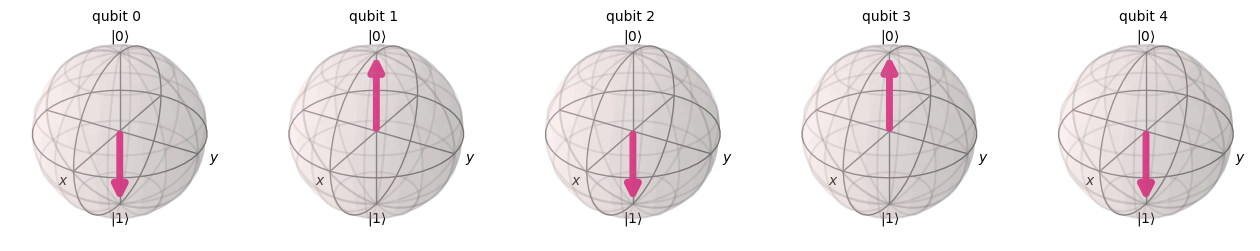

In [29]:
def OR(a, b, draw=True):
    print("OR Gate Simulation:")
    print(f"Input State:|{a}111{b}>")
    print("Applying OR(A,B) ...")
    A = QuantumRegister(1, f"A ")
    B = QuantumRegister(1, f"B ")
    C = QuantumRegister(1, "C = |1>")
    D = QuantumRegister(1, "D = |1>")
    E = QuantumRegister(1, "E = |1>")
    qc = QuantumCircuit(B, C, D, E, A)
    qc.reverse_bits()
    if a:
        qc.x(4)
    if b:
        qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.ccx(4, 2, 3)
    qc.ccx(0, 2, 1)
    qc.ccx(1, 3, 2)
    qc.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    print(f" Output |{list(counts.keys())[0]}>")
    print(f"|A NOT(A) OR(A,B) NOT(B) B>")

    truth_table_data = {
                "A": [0, 0, 1, 1],
                "B": [0, 1, 0, 1],
                "C": [1, 1, 1, 1],
                "D": [1, 1, 1, 1],
                "E": [1, 1, 1, 1],
                "A'": [0, 0, 1, 1],
                "NOT(A)": [1, 1, 0, 0],
                "OR(A,B)": [0, 1, 1, 1],
                "NOT(B)": [1, 0, 1, 0],
                "B'": [0, 1, 0, 1],
            }

    truth_table = pd.DataFrame(truth_table_data)
    
    print("\nTruth Table:")
    print(truth_table.to_string(index=False))

    if draw:
        qc_draw = QuantumCircuit(B, C, D, E, A)
        qc_draw.ccx(4, 2, 3)
        qc_draw.ccx(0, 2, 1)
        qc_draw.ccx(1, 3, 2)
        qc_draw.measure_all()
        display(qc_draw.draw(output="mpl", reverse_bits=True, style="iqp"))


    return qc


qc= OR(1, 1)
# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
# Simulate the transpiled quantum circuit
result = simulator.run(assemble(transpiled_qc)) 
# Display the Bloch vector of the resulting state
statevector = result.result().get_statevector()
plot_bloch_multivector(statevector)

